# Lambda functions and Logistic regressions
For the purposes of this workshop, imagine you have been asked to work out whether different variables in the CIN census can be used to predict whether a child's referral will be NFA using a logistic regression. In order to do this, we'll need to make our model based on some categories: we'll use referral source, age, and ethnicity. To do this, we need to use data in our dataframes to build new fields in our dataframes containing these categories. Whilst there are Pandas built in methods to do this normally and more efficiently, we'll use make our own functions to do this from scratch and apply them with lambda functions as this will help us continue learning how to write functions, and also how to extend that in to lambda functions. 

## Getting to work
First off, we'll read our data in from the fake_cin subdirectory of the data directory. We'll read in the sheets containing ethnicity, DOB, referral sources, and whether the referral is NFA. Next, we merge these together so that every CIN details row has the childs relevant other information in that row.

In [64]:
import piplite

await piplite.install('pandas')

import pandas as pd
import datetime as dt

cin_details = pd.read_csv('data/fake_cin/CINdetails.csv')
child_characteristics = pd.read_csv('data/fake_cin/ChildCharacteristics.csv')
child_identifiers = pd.read_csv('data/fake_cin/ChildIdentifiers.csv')

cin_characteristics = cin_details.merge(child_characteristics, on='LAchildID')
data = cin_characteristics.merge(child_identifiers, on='LAchildID')
data=data[['LAchildID', 'ReferralSource', 'Ethnicity', 'PersonBirthDate', 'ReferralNFA']]

print(data)

           LAchildID ReferralSource Ethnicity PersonBirthDate  ReferralNFA
0    RND000215205141              4      WIRT      2019-12-06        False
1    RND000824303014              6      WROM      2011-04-27        False
2    RND000824303014             3A      WROM      2011-04-27        False
3    RND000750143123             2A      AOTH      2017-06-06        False
4    RND000750143123              9      AOTH      2017-06-06        False
..               ...            ...       ...             ...          ...
397  RND000541643134             1C      BCRB      2021-12-09         True
398  RND000404939452             1A      AIND      2013-07-23         True
399  RND000404939452             5B      AIND      2013-07-23         True
400  RND000404939452             1A      AIND      2013-07-23         True
401  RND000589802835              4      WBRI      2021-10-25         True

[402 rows x 5 columns]


Imagine that, when being asked to use referral source for a predictor, the service lead wants a coarse grained picture, so the direct location of the referral, not the fine grained person, so what type of person from each referral made it. For instance, a referral source 3 is  from a healthcare professional, but there are also letters after to indicate what professional from that service made the referral, for instance GP or nurse. What we want, then, is just the place the referral is from, not the person too, so not 3A, just 3.

We want, first of all, to know all of the unique referral sources and we want to print this to get an idea of what we're working with.

In [65]:
print(data['ReferralSource'].unique())

['4' '6' '3A' '2A' '9' '2B' '10' '1A' '1B' '8' '7' '3F' '5B' '3B' '3C'
 '5A' '1C' '3D' '1D' '3E' '5C']


## FUnctions and lambda functions

Next, we want to write a function that will return just the referral number, and then apply it for each row using a labmda function. It would be possible to do this easily with a Pandas method, shown in the commented out line below, but that doesn't teach us anything about writing different types of function, does it?

The first cell below shows both a normal function and a lambda function. Lambda functions are just like normal functions except, instead of defining them normally, we write lambda, then the argument of the function on the left hand side of the ':' and the expression that interracts with the argument on the right. Lambda functions give us short hand for defining functions, but also, as will be seen in the second cell block, can be used in place to perform their action.

The function ref_checker, defined below is passed a row argument, and, looking in the ReferralSource column in that row will return a value based on what's in that row. As the Referral sources are strings, it looks to see if the string in that field and row contains a given number (as a string). For instance, it looks to see if '1' is in each row, and if it is, the function returns '1'. So, this means that, if a 1 is ANYWHERE in the string in ReferralSource, the function returns a 1. Unfortunately, from the printed unique values above, we know that one of the referral sources is 10, which would return a 1 instead of 10 for that row. As this is the case, we check that 10 isn't in that row too first. In essence, the function looks for numberic values as strings in the strings in ReferralSource and returns just the numberic value as a string.

The next thing is the lambda function, this replaces the data in ReferralSource with the output returned by the missing function. It uses the pandas apply method to apply the lambda function on axis 1 (row-wise in a column) to every row. How this works is, row by row (as the axis of .apply is 1) it goes through the data df, and uses a lambda function with the row as the variable, and ref_checker as the expression (with row as it's argument) to apply the output of ref_checker to the row in the ReferralSource field.

In [1]:
def normal_function(x):
    x += 1
    print(x)


lambda_function = lambda x : print(x + 1)

normal_function(1)
lambda_function(1)

2
2


In [69]:
#df['ReferralSource'] = df['ReferralSource'].str[0]

def ref_checker(row):
    if  ('1' in row['ReferralSource']) & ~('10' in row['ReferralSource']):
        return '1'
    elif '2' in row['ReferralSource']:
        return '2'
    elif '3' in row['ReferralSource']:
        return '3'
    elif '4' in row['ReferralSource']:
        return '4'
    elif '5' in row['ReferralSource']:
        return '5'
    elif '6' in row['ReferralSource']:
        return '6'
    elif '7' in row['ReferralSource']:
        return '7'
    elif '8' in row['ReferralSource']:
        return '8'
    elif '9' in row['ReferralSource']:
        return '9'
    elif '10' in row['ReferralSource']:
        return '10'
    
data['ReferralSource'] = data.apply(lambda row: ref_checker(row), axis=1)

## Your go
In the cell below, I've defined a new field in the data df, Age. It is, unsurprisingly, children's ages. I've done this by using a pandas to_datetime method on the day I wrote this notebook, and the pandas datetime method on the PersonBirthDateField, and taking the latter from the former. This gives an age in days as a datetime timedelta object. We don't want to work with that though, we want age in years as a float. To convert a datetime time delta object to a float, simply divide a time delta object by a timedelta object, in this case, I divide it by a timedelta object with a vlaue of 365 days, making the Age column equal to children's ages, in years, as a float. I've also printed the list of unique ethnicities, which you'll use shortly.

Now, having an Age column, it's your go. I want you to write a function and a lambda function to apply it to the data df that returns True if a child is over 11 and a False if they are under 11. I've left part of the function and lambda function in code to give you a hand.

The next step is a bit harder, using this list of ethnicity codes that are subcategories of white (['WIRT', 'WROM', 'WBRI', 'WOTH', 'WIRI']), write a function and lambda function to apply it that makes a new field in the data df that's true if children are white and false if they are not.

Last step here to make sure you really have it. Write the same set of function and lambda function as above, but without me giving you the list of ethnicities, and this time, apply it to return true if a child is Asian, and false otherwsie in a new field in data.

In [ ]:
data['Age'] = (pd.to_datetime('2023-03-23', format='%Y-%m-%d') - pd.to_datetime(data['PersonBirthDate'], format='%Y-%m-%d'))
data['Age'] = data['Age']/ dt.timedelta(days=365)

print(data)

print(data['Ethnicity'].unique())

In [29]:

def age_group(row):
    if # inequality expression on the Age column
        return # Return what?
    else:
        # Return what?

data['11OrOver'] = data.apply(lambda row: age_group(row), axis=1)    

# Write your function that returns true if the Ethnicity field of a row is white here, and false if not
data['White'] = # Apply your function from above using a lambda function here

# Write a function and lambda function to make an Asian field in the data df

           LAchildID ReferralSource Ethnicity PersonBirthDate  ReferralNFA  \
0    RND000215205141              4      WIRT      2019-12-06        False   
1    RND000824303014              6      WROM      2011-04-27        False   
2    RND000824303014              3      WROM      2011-04-27        False   
3    RND000750143123              2      AOTH      2017-06-06        False   
4    RND000750143123              9      AOTH      2017-06-06        False   
..               ...            ...       ...             ...          ...   
397  RND000541643134              1      BCRB      2021-12-09         True   
398  RND000404939452              1      AIND      2013-07-23         True   
399  RND000404939452              5      AIND      2013-07-23         True   
400  RND000404939452              1      AIND      2013-07-23         True   
401  RND000589802835              4      WBRI      2021-10-25         True   

           Age  11OrOver  White  
0     3.295890         0     

## The logistic regression
What was the point of all of this? Well, if we have categorical variables, we can sort them out seprate binary variables and use them as the X (indipendent variable) in our logistic regression against our y (dependent variable) to determine if X can be used to predict y.

The code below uses scikit learn to do some very simple machine learning to perform a logistic regression to determine if X predicts y (if a referral is NFA in our case). Don't worry about how it works for now, just know that by changing the field X uses (so Over11, White, and Asian) it will preform some analysis to determine if that is a predictor for ReferralNFA, and then plot an ROC curve to illustrate the quality of the prediciton. In the most simple terms possible, if the blue curve in the ROC graph is above the 45 degree learn, the prediction based on your variable is better than guessing, if it's below, it's worse. A point: don't expect to get meaningful results out of this calculation as all the data is synthetic!

Have a go by changing the field in X yourself to one of the new boolean fields you made.

In [9]:
await piplite.install('scikit-learn')
await piplite.install('matplotlib')

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
X = data['Over11']
y = data['ReferralNFA']

In [59]:
X = X.values.reshape(-1, 1)
y = y.values

In [60]:
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_probs = model.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.14812767493547296


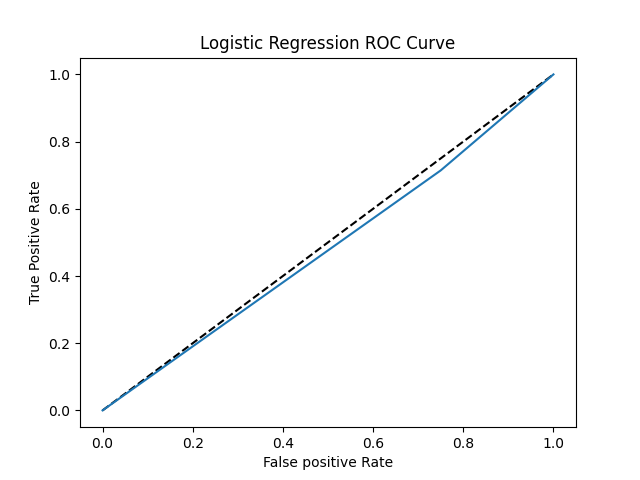

0.48214285714285715


In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print(roc_auc_score(y_test, y_pred_probs))